In [111]:
# loading libraries
library(readr)
library(fBasics)
library(dplyr)
library(ggplot2)
library(tidyr)
library(GGally)
library(knitr)
library(FactoMineR)
library(factoextra)
library(lmtest)

In [14]:
# loading dataset
data_path <- "dataset.csv"
df_raw <- read_csv(data_path, show_col_types = FALSE)

# data visualization
cat("N rows:", nrow(df_raw), "N Columns:", ncol(df_raw),"\n")
print("Columns name:")
names(df_raw)
head(df_raw)

# Na summary
cat("Tot NA:", sum(is.na(df_raw)), "\n")

# statistiche base
basic_stats <- basicStats(df_raw)
print(basic_stats)

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


N rows: 4898 N Columns: 12 
[1] "Columns name:"


[1] "fixed acidity"        "volatile acidity"     "citric acid"         
 [4] "residual sugar"       "chlorides"            "free sulfur dioxide" 
 [7] "total sulfur dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


Tot NA: 0 
            fixed.acidity volatile.acidity citric.acid residual.sugar
nobs          4898.000000      4898.000000 4898.000000    4898.000000
NAs              0.000000         0.000000    0.000000       0.000000
Minimum          3.800000         0.080000    0.000000       0.600000
Maximum         14.200000         1.100000    1.660000      65.800000
1. Quartile      6.300000         0.210000    0.270000       1.700000
3. Quartile      7.300000         0.320000    0.390000       9.900000
Mean             6.854788         0.278241    0.334192       6.391415
Median           6.800000         0.260000    0.320000       5.200000
Sum          33574.750000      1362.825000 1636.870000   31305.150000
SE Mean          0.012058         0.001440    0.001729       0.072473
LCL Mean         6.831149         0.275418    0.330801       6.249336
UCL Mean         6.878426         0.281065    0.337582       6.533494
Variance         0.712114         0.010160    0.014646      25.725770
Stdev    

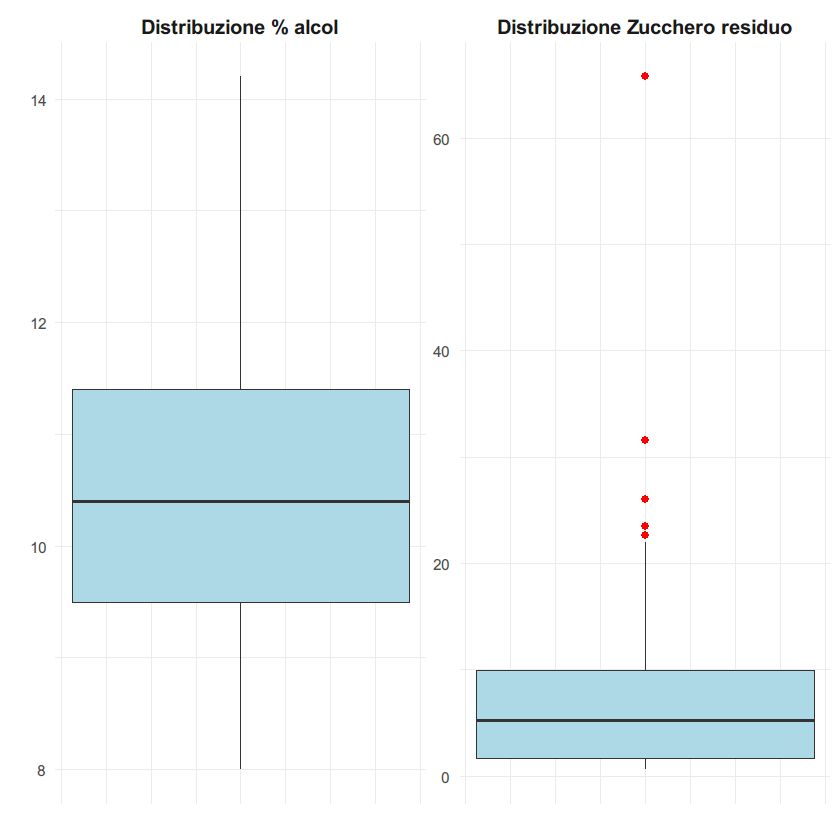

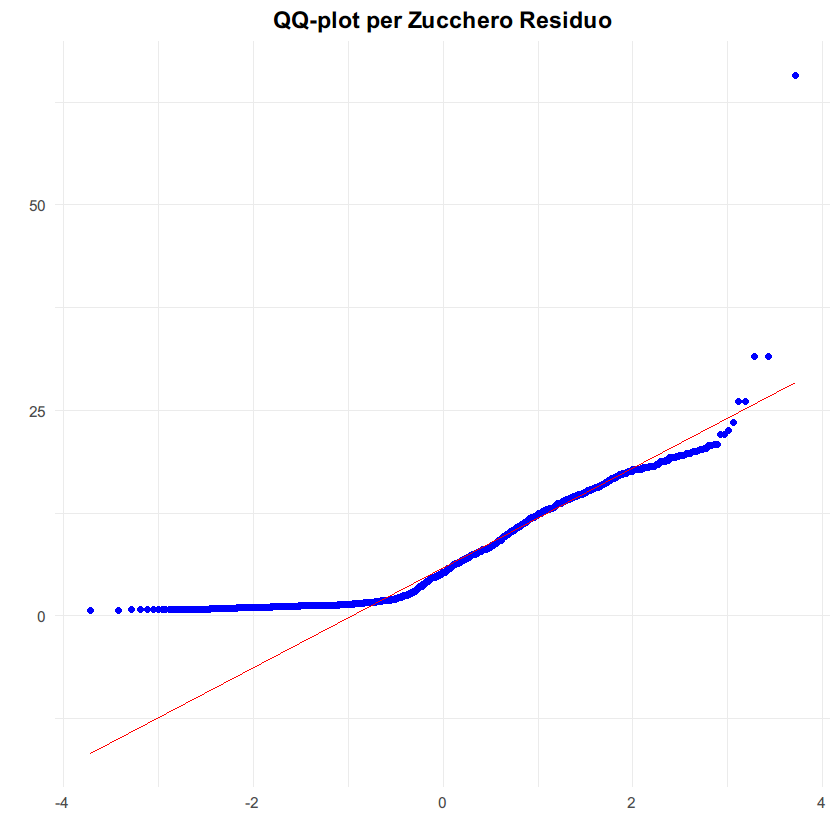

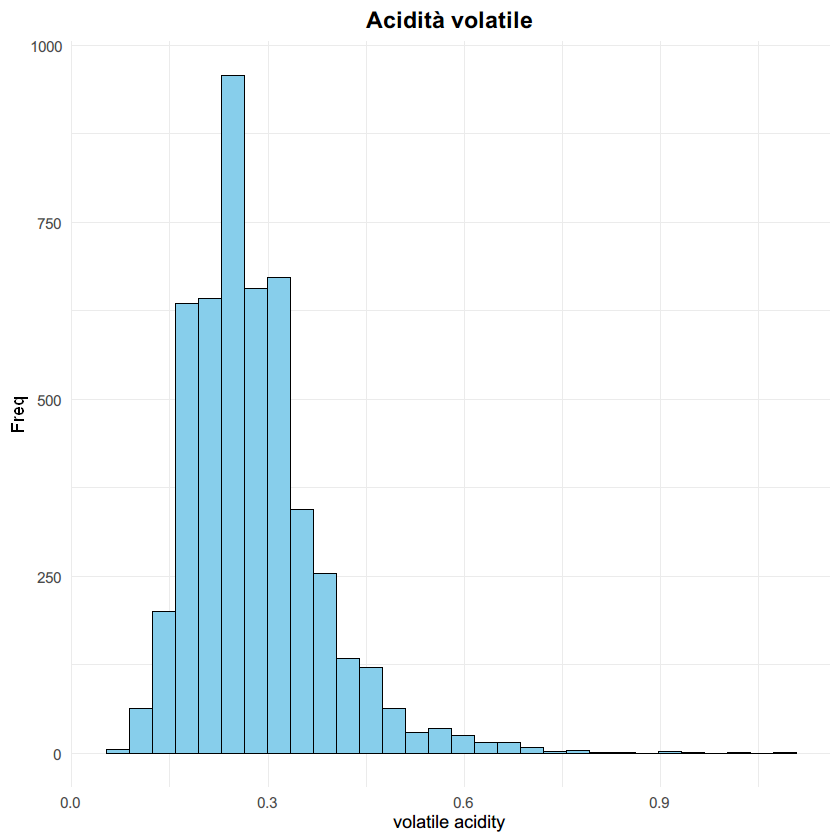

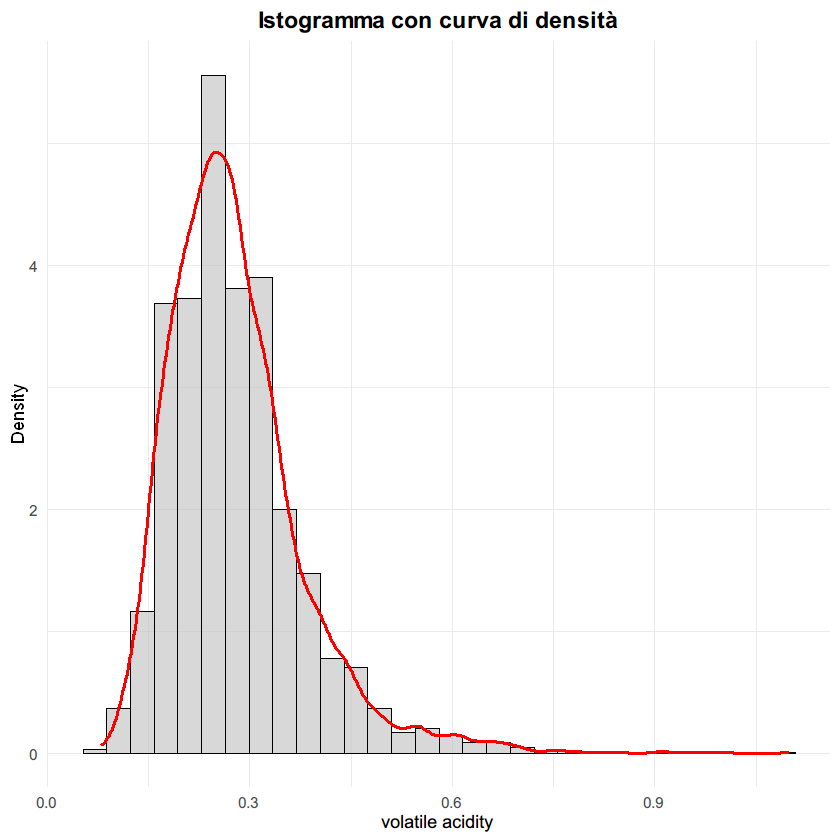

In [17]:
# Plots

# box-plot visualization - alcohol and residual sugar
# conversion from wide to long (ggplot2 works better with long)
df_long <- df_raw %>%
  dplyr::select('alcohol', 'residual sugar') %>%
  tidyr::pivot_longer(cols = everything(), names_to = "name", values_to = "value")

# rename labels
mapping <- c("alcohol" = "Distribuzione % alcol",
             "residual sugar" = "Distribuzione Zucchero residuo")

df_long$name <- mapping[df_long$name]

# box-plot
ggplot(df_long, aes(y = value, x = 1)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16, outlier.size = 2,
               fill = "lightblue") +
  facet_wrap(~name, scales = "free_y") +  
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    strip.text = element_text(face = "bold", size = 12)
  ) 

# qq-plot visualization - alcohol and residual sugar
# filter on residual sugar
df_rs <- df_raw[["residual sugar"]]

# qq-plot
ggplot(data.frame(residual_sugar = df_rs), aes(sample = residual_sugar)) +
  stat_qq(color = "blue") +       
  stat_qq_line(color = "red") + 
  theme_minimal() +
  labs(title = "QQ-plot per Zucchero Residuo",
       x = "",
       y = "") +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# histogram plot visualization - volatile acidity
# filter on volatile acidity
df_va <- df_raw[["volatile acidity"]]

# histogram plot
ggplot(data.frame(volatile_acidity = df_va), aes(x = volatile_acidity)) +
  geom_histogram(bins = 30,   
                 fill = "skyblue", 
                 color = "black") +
  labs(title = "Acidità volatile",
       x = "volatile acidity",
       y = "Freq") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# histogram plot with density curve
ggplot(data.frame(volatile_acidity = df_va), aes(x = volatile_acidity)) +
  geom_histogram(aes(y = ..density..), 
                 bins = 30,          
                 fill = "grey", 
                 color = "black",
                 alpha = 0.6) +         
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Istogramma con curva di densità",
       x = "volatile acidity",
       y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


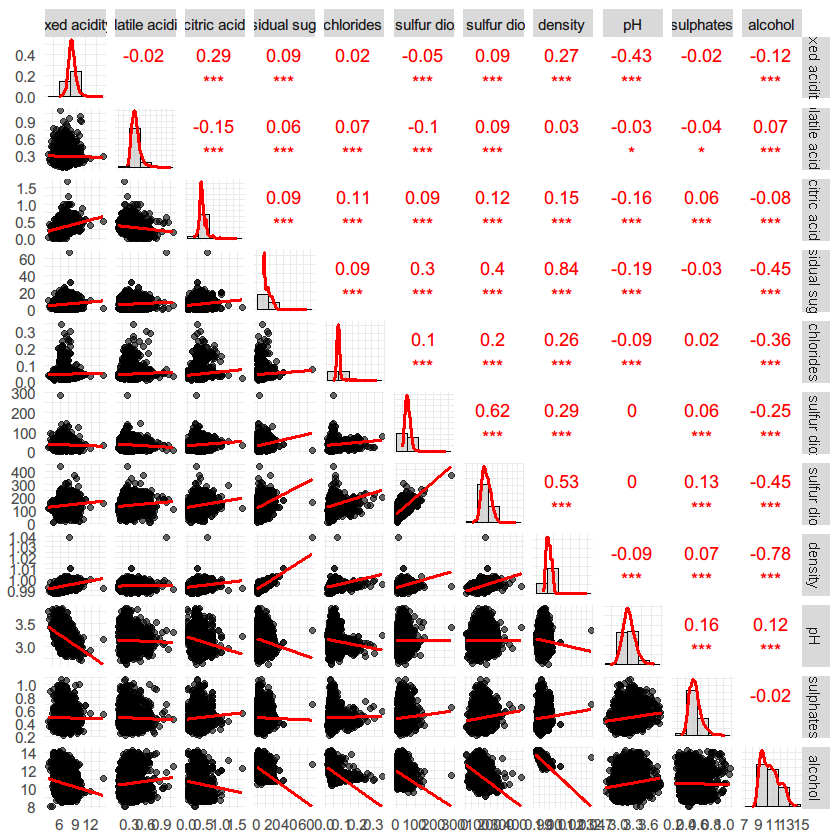



Table: Matrice di correlazione

|                     | fixed acidity| volatile acidity| citric acid| residual sugar| chlorides| free sulfur dioxide| total sulfur dioxide| density|    pH| sulphates| alcohol|
|:--------------------|-------------:|----------------:|-----------:|--------------:|---------:|-------------------:|--------------------:|-------:|-----:|---------:|-------:|
|fixed acidity        |          1.00|            -0.02|        0.29|           0.09|      0.02|               -0.05|                 0.09|    0.27| -0.43|     -0.02|   -0.12|
|volatile acidity     |         -0.02|             1.00|       -0.15|           0.06|      0.07|               -0.10|                 0.09|    0.03| -0.03|     -0.04|    0.07|
|citric acid          |          0.29|            -0.15|        1.00|           0.09|      0.11|                0.09|                 0.12|    0.15| -0.16|      0.06|   -0.08|
|residual sugar       |          0.09|             0.06|        0.09|           1.00| 

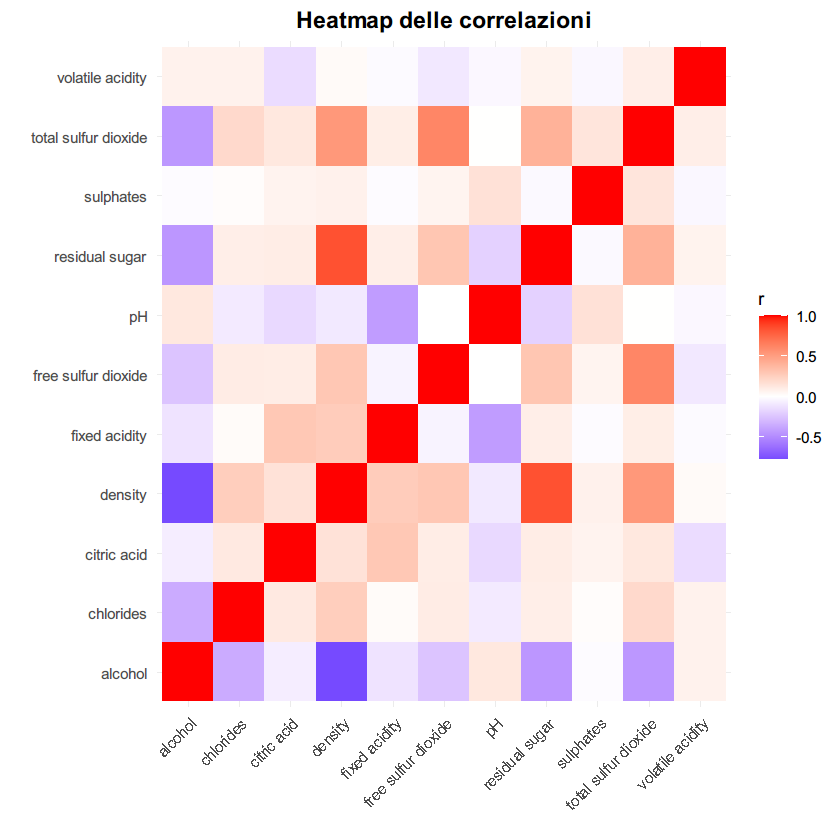

In [13]:
# Exploratory Data Analysis
# delete quality column
df_pp <- df_raw %>% dplyr::select(-'quality')

# func definition with 2 arg and others (...)
my_corr <- function(data, mapping, ...) {

  # extracts numeric values
  x <- GGally::eval_data_col(data, mapping$x)
  y <- GGally::eval_data_col(data, mapping$y)
  
  # calculates corr
  test <- cor.test(x, y)

  # extracts r and p-value
  r <- round(test$estimate, 2)
  p <- test$p.value

  # defines * for p-values
  sig <- ifelse(p < 0.001, "***",
                ifelse(p < 0.01, "**",
                       ifelse(p < 0.05, "*", "")))
    
    # insert text * in the plot
    ggally_text(
    label = paste0("", r, "\n",sig),
    mapping = mapping,
    color="red",
    ...
  ) + theme_void()
}

# histogram personalization
my_diag <- function(data, mapping, ...) {
  ggplot(data = data, mapping = mapping) +
    geom_histogram(aes(y = ..density..), fill = "grey", color = "black", bins=5, alpha = 0.6) +
    geom_density(color = "red", size = 1) +    # curva rossa
    theme_minimal()
}

# scatterplot personalization
my_lower <- function(data, mapping, ...) {
  ggplot(data = data, mapping = mapping) +
    geom_point(alpha = 0.6) +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  
    theme_minimal()
}

# pairplot
ggpairs(df_pp,
        lower = list(continuous = my_lower),      # scatterplot
        diag  = list(continuous = my_diag),       # histogram with densità
        upper = list(continuous = my_corr))       # corr

# heatmap visualization
# calculates corr_matrix for heatmap use
corr_mat <- cor(df_pp, use = "pairwise.complete.obs")

# from wide to long
cor_long <- corr_mat %>%
  as.data.frame() %>%
  tibble::rownames_to_column(var = "Var1") %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "Correlation")

# 4. Heatmap
ggplot(cor_long, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Heatmap delle correlazioni", x="",y="",fill = "r") +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )
kable(round(corr_mat, 2), caption = "Matrice di correlazione")

        eigenvalue percentage of variance cumulative percentage of variance
comp 1  3.22225389              29.293217                          29.29322
comp 2  1.57523993              14.320363                          43.61358
comp 3  1.22167134              11.106103                          54.71968
comp 4  1.01852235               9.259294                          63.97898
comp 5  0.97333458               8.848496                          72.82747
comp 6  0.93874151               8.534014                          81.36149
comp 7  0.72659802               6.605437                          87.96692
comp 8  0.59935848               5.448713                          93.41564
comp 9  0.41414367               3.764942                          97.18058
comp 10 0.28948714               2.631701                          99.81228
comp 11 0.02064909               0.187719                         100.00000
            stdev
comp 1  1.7950638
comp 2  1.2550856
comp 3  1.1052924
comp 4  1.009218

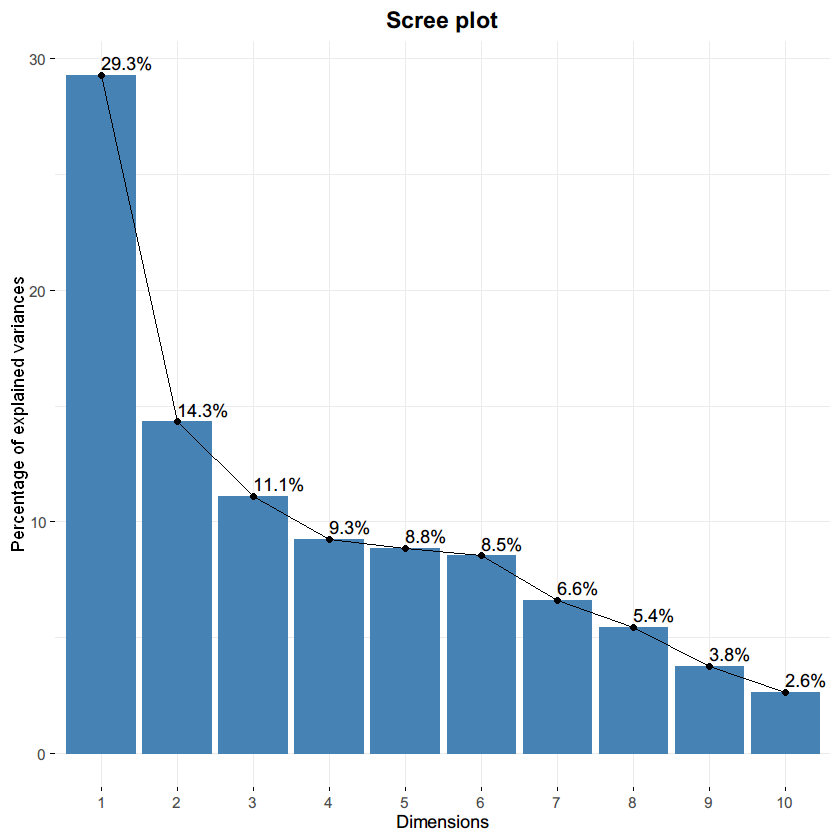

               Variable        Dim.1        Dim.2      Dim.3
1         fixed acidity  0.282217142 -0.737435862  0.1341475
2      volatile acidity  0.009135966  0.064923137 -0.6531963
3           citric acid  0.258578653 -0.433374242  0.5575061
4        residual sugar  0.767225271  0.010981236 -0.2368861
5             chlorides  0.380573378 -0.011045140 -0.1131460
6   free sulfur dioxide  0.539119373  0.364420558  0.3088298
7  total sulfur dioxide  0.729966632  0.306281547  0.1374710
8               density  0.918217470  0.007903018 -0.1428069
9                    pH -0.231261447  0.729636997  0.1400091
10            sulphates  0.077868657  0.279501758  0.4788614
11              alcohol -0.784869790 -0.044641722  0.1170540


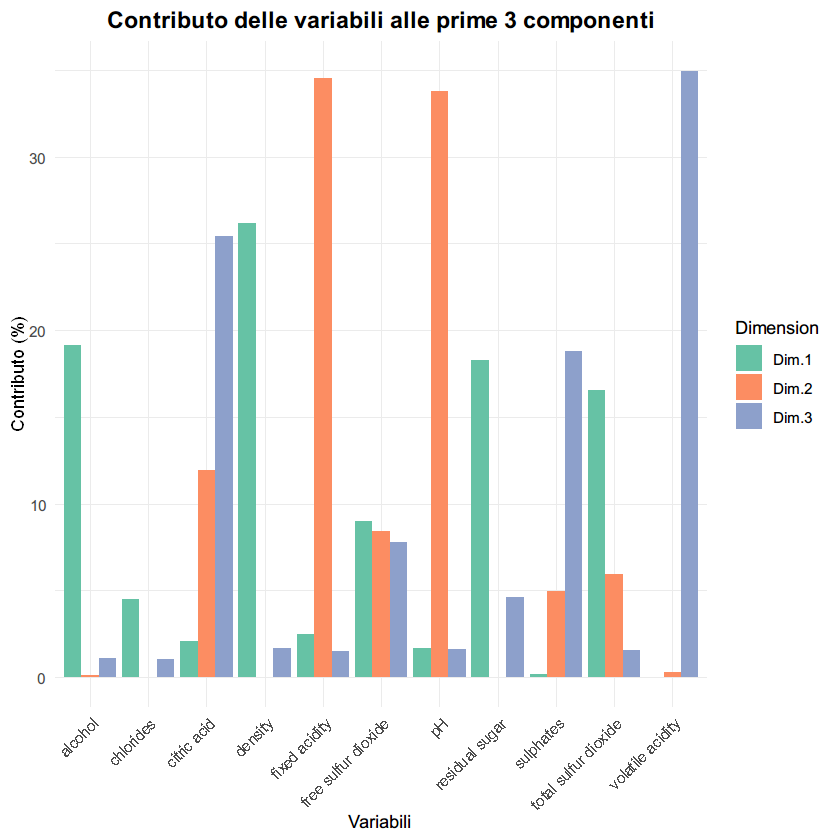

               Variable        Dim.1        Dim.2      Dim.3
1         fixed acidity 7.964652e-02 5.438117e-01 0.01799554
2      volatile acidity 8.346588e-05 4.215014e-03 0.42666543
3           citric acid 6.686292e-02 1.878132e-01 0.31081300
4        residual sugar 5.886346e-01 1.205875e-04 0.05611504
5             chlorides 1.448361e-01 1.219951e-04 0.01280201
6   free sulfur dioxide 2.906497e-01 1.328023e-01 0.09537585
7  total sulfur dioxide 5.328513e-01 9.380839e-02 0.01889829
8               density 8.431233e-01 6.245769e-05 0.02039382
9                    pH 5.348186e-02 5.323701e-01 0.01960253
10            sulphates 6.063528e-03 7.812123e-02 0.22930819
11              alcohol 6.160206e-01 1.992883e-03 0.01370163


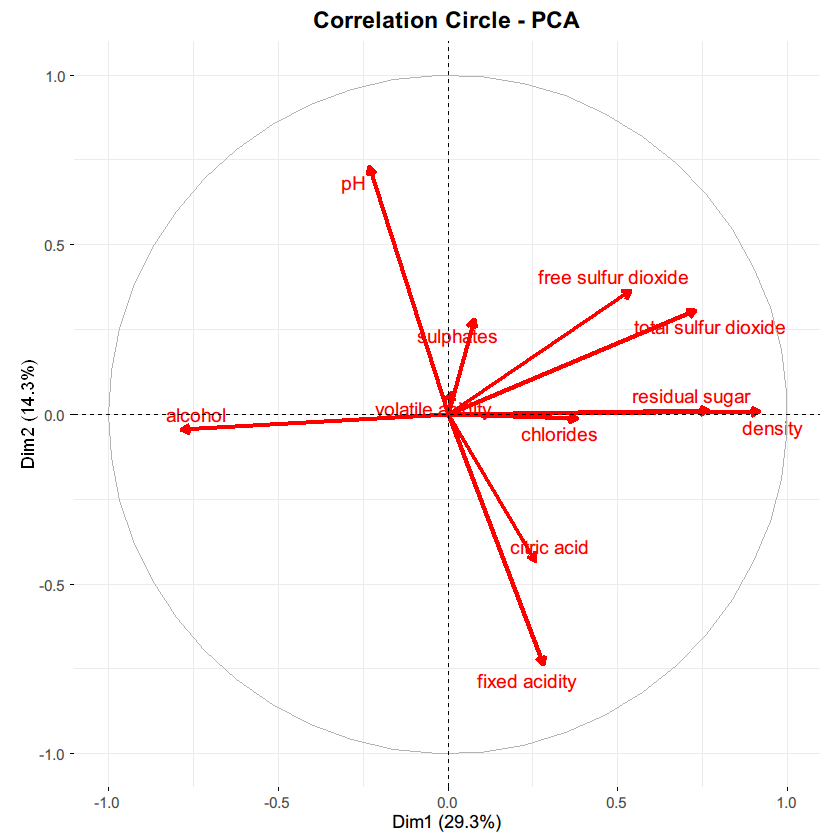

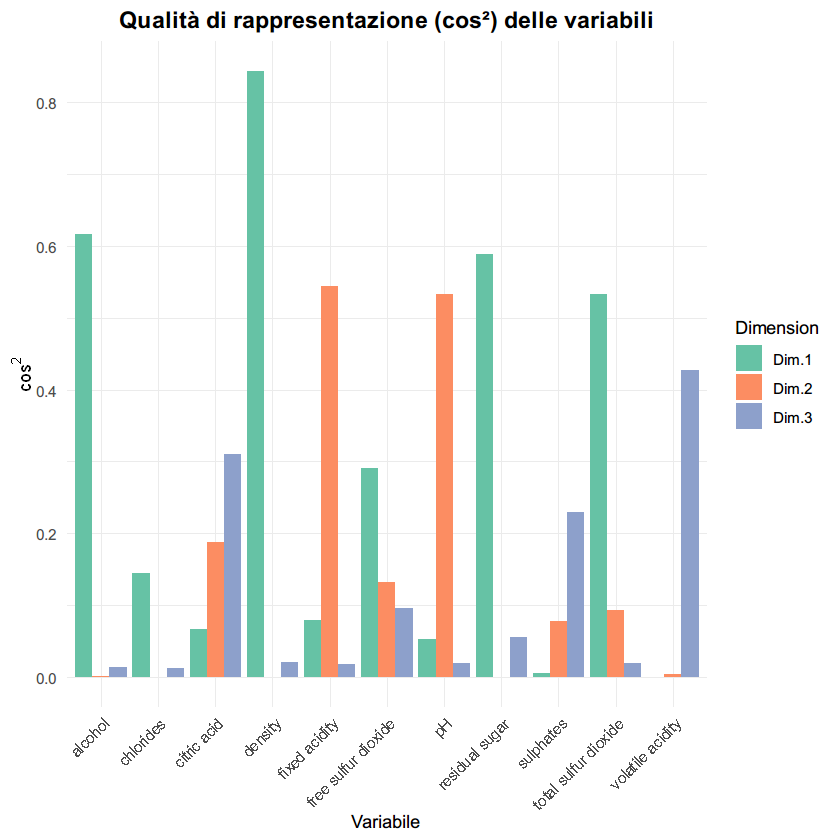

In [34]:
# Principal Component Analysis
# calculates pca, with centred and standardized values (scale.unit=T),
# returns ncp components, with no graphs (graph=F)
var.pca <- FactoMineR::PCA(df_pp, scale.unit = TRUE, ncp = 10, graph = FALSE)

# prints components with eigen, variance and cumulative
eig_df <- as.data.frame(var.pca$eig)
print(eig_df)    

# screeplot
factoextra::fviz_eig(var.pca, addlabels = TRUE) + 
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# var contribution
# var and contrib are two columns of df's PCA
var_con <- as.data.frame(var.pca$var$contrib) %>%
  tibble::rownames_to_column(var = "Variable") %>%  
  dplyr::select(Variable, Dim.1, Dim.2, Dim.3)
print(var_con)

# var contribution plot (wide to long)
var_con_long <- var_con %>%
  pivot_longer(cols = starts_with("Dim"), 
               names_to = "Dimension", 
               values_to = "Contribution")

# contribution plot
ggplot(var_con_long, aes(x = Variable, y = Contribution, fill = Dimension)) +
  geom_bar(stat = "identity", position = "dodge") +  
  labs(title = "Contributo delle variabili alle prime 3 componenti",
       x = "Variabili",
       y = "Contributo (%)") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  ) +
  scale_fill_brewer(palette = "Set2")

# var coordinates
# var and coord are two columns of df's PCA
var_coord <- as.data.frame(var.pca$var$coord) %>%
  dplyr::select(Dim.1, Dim.2, Dim.3) %>%
  tibble::rownames_to_column(var = "Variable")
print(var_coord)

# correlation circle
fviz_pca_var(var.pca, col.var = "red",
             repel = TRUE,        # try to no overlay labels
             arrowsize = 1.2,
             title = "Correlation Circle - PCA") + 
             theme(
               plot.title = element_text(face = "bold", size = 14, hjust = 0.5))

# quality representation
# var and cos2 are two columns of df's PCA
var_cos2 <- as.data.frame(var.pca$var$cos2) %>%
  dplyr::select(Dim.1, Dim.2, Dim.3) %>%
  tibble::rownames_to_column(var = "Variable")
print(var_cos2)

var_cos2_long <- var_cos2 %>%
  pivot_longer(cols = starts_with("Dim"),
               names_to = "Dimension",
               values_to = "Cos2")

# quality representation plot
ggplot(var_cos2_long, aes(x = Variable, y = Cos2, fill = Dimension)) +
  geom_bar(stat = "identity", position = "dodge") +  
  labs(title = "Qualità di rappresentazione (cos²) delle variabili",
       x = "Variabile",
       y = expression(cos^2)) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  ) +
  scale_fill_brewer(palette = "Set2")

In [36]:
# Linear regression
# linear model construction
# quality ~ . says to R to use other columns as independent and
# quality as dependent. cbind() combines in a new df: lm() expects
# that x and y are in the same df
mod <- lm(quality ~ ., data = cbind(quality = df_raw$quality, df_pp))

# printing
summary(mod)

# backward selection algorithm to reduce var
mod_r <- step(mod, direction = "both")
summary(mod_r)


Call:
lm(formula = quality ~ ., data = cbind(quality = df_raw$quality, 
    df_pp))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8348 -0.4934 -0.0379  0.4637  3.1143 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.502e+02  1.880e+01   7.987 1.71e-15 ***
`fixed acidity`         6.552e-02  2.087e-02   3.139  0.00171 ** 
`volatile acidity`     -1.863e+00  1.138e-01 -16.373  < 2e-16 ***
`citric acid`           2.209e-02  9.577e-02   0.231  0.81759    
`residual sugar`        8.148e-02  7.527e-03  10.825  < 2e-16 ***
chlorides              -2.473e-01  5.465e-01  -0.452  0.65097    
`free sulfur dioxide`   3.733e-03  8.441e-04   4.422 9.99e-06 ***
`total sulfur dioxide` -2.857e-04  3.781e-04  -0.756  0.44979    
density                -1.503e+02  1.907e+01  -7.879 4.04e-15 ***
pH                      6.863e-01  1.054e-01   6.513 8.10e-11 ***
sulphates               6.315e-01  1.004e-01   6.291 3.44e-10 ***
alcohol       

Start:  AIC=-2788.44
quality ~ `fixed acidity` + `volatile acidity` + `citric acid` + 
    `residual sugar` + chlorides + `free sulfur dioxide` + `total sulfur dioxide` + 
    density + pH + sulphates + alcohol

                         Df Sum of Sq    RSS     AIC
- `citric acid`           1     0.030 2758.4 -2790.4
- chlorides               1     0.116 2758.4 -2790.2
- `total sulfur dioxide`  1     0.323 2758.7 -2789.9
<none>                                2758.3 -2788.4
- `fixed acidity`         1     5.562 2763.9 -2780.6
- `free sulfur dioxide`   1    11.039 2769.4 -2770.9
- sulphates               1    22.339 2780.7 -2750.9
- pH                      1    23.948 2782.3 -2748.1
- density                 1    35.044 2793.4 -2728.6
- alcohol                 1    36.020 2794.3 -2726.9
- `residual sugar`        1    66.152 2824.5 -2674.4
- `volatile acidity`      1   151.345 2909.7 -2528.8

Step:  AIC=-2790.39
quality ~ `fixed acidity` + `volatile acidity` + `residual sugar` + 
    chlor


Call:
lm(formula = quality ~ `fixed acidity` + `volatile acidity` + 
    `residual sugar` + `free sulfur dioxide` + density + pH + 
    sulphates + alcohol, data = cbind(quality = df_raw$quality, 
    df_pp))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8246 -0.4938 -0.0396  0.4660  3.1208 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.541e+02  1.810e+01   8.514  < 2e-16 ***
`fixed acidity`        6.810e-02  2.043e-02   3.333 0.000864 ***
`volatile acidity`    -1.888e+00  1.095e-01 -17.242  < 2e-16 ***
`residual sugar`       8.285e-02  7.287e-03  11.370  < 2e-16 ***
`free sulfur dioxide`  3.349e-03  6.766e-04   4.950 7.67e-07 ***
density               -1.543e+02  1.834e+01  -8.411  < 2e-16 ***
pH                     6.942e-01  1.034e-01   6.717 2.07e-11 ***
sulphates              6.285e-01  9.997e-02   6.287 3.52e-10 ***
alcohol                1.932e-01  2.408e-02   8.021 1.31e-15 ***
---
Signif. codes:  0 '***' 0.0


	One Sample t-test

data:  res
t = -1.9575e-16, df = 4897, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.02102518  0.02102518
sample estimates:
    mean of x 
-2.099341e-18 


	Shapiro-Wilk normality test

data:  res
W = 0.9894, p-value < 2.2e-16


	studentized Breusch-Pagan test

data:  mod_r
BP = 86.194, df = 8, p-value = 2.748e-15


	Durbin-Watson test

data:  mod_r
DW = 1.6213, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



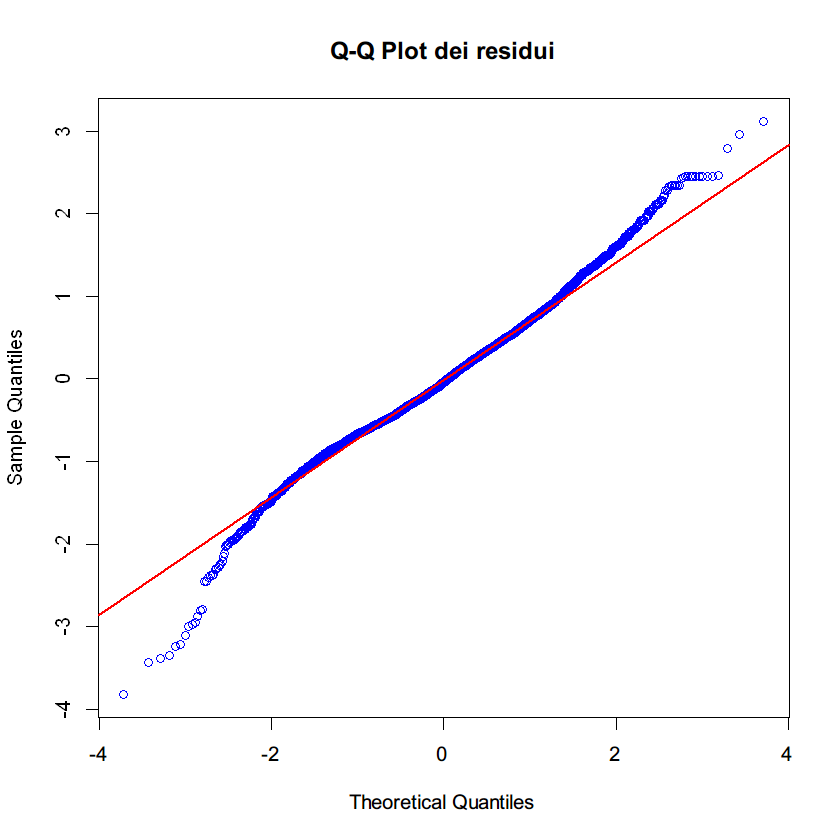

In [80]:
# Model validation

# t test
res = residuals(mod_r)
# t test res mean = 0
t_test <- t.test(res, mu = 0)
print(t_test)

# shapiro-wilk test
shapiro = shapiro.test(res)
print(shapiro) 

# shapiro qqplot
qqnorm(res, main = "Q-Q Plot dei residui", col="blue") 
qqline(res, col = "red", lwd = 2)

# Breusch-Pagan test
bp = bptest(mod_r) 
print(bp)

# Durbin-Watson test
dw = dwtest(mod_r)
print(dw)

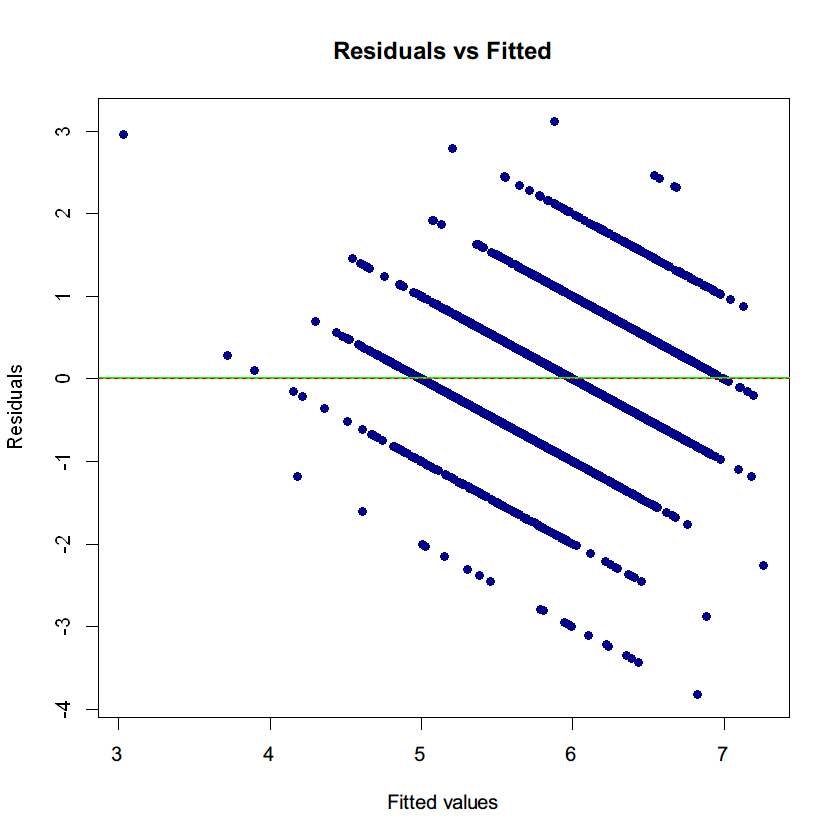

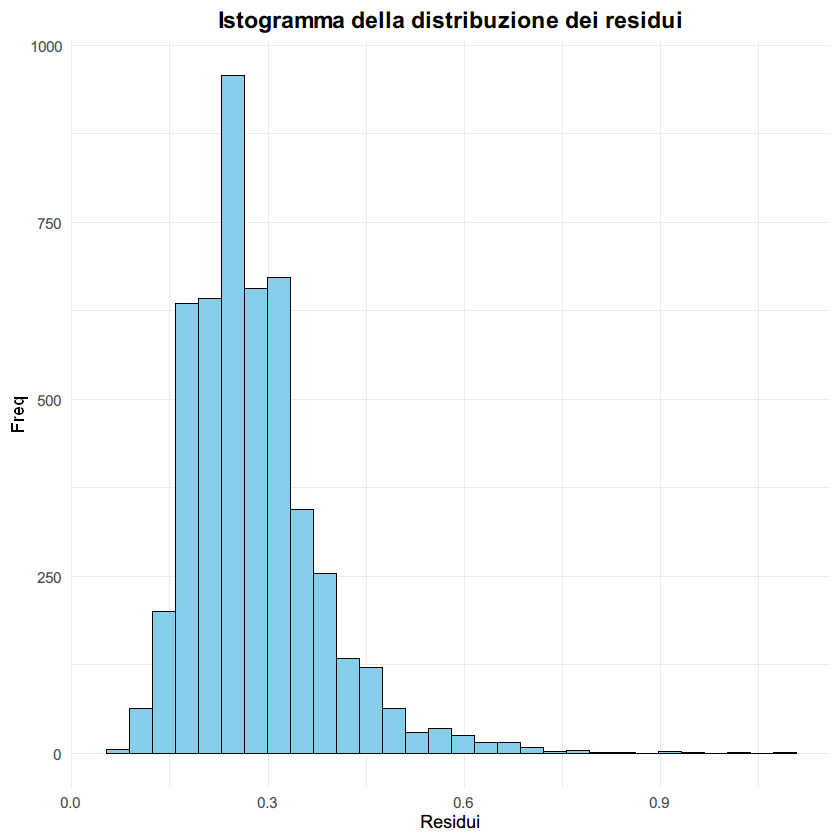

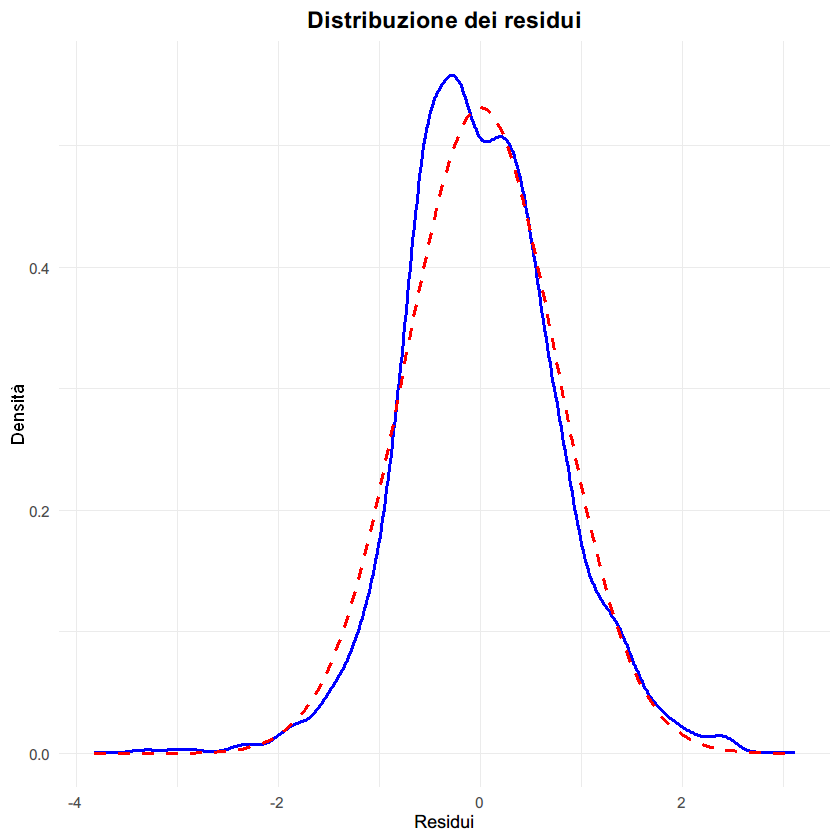

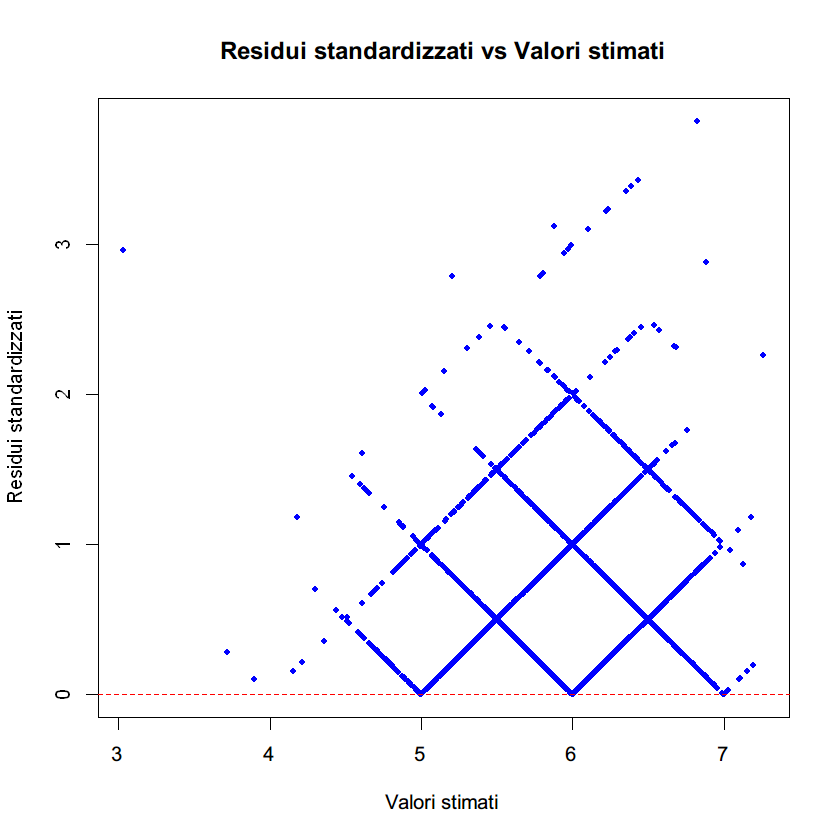

In [113]:
# residuals analysis

# res plot
fit = fitted(mod_r)
plot(fit, res,
     xlab = "Fitted values",
     ylab = "Residuals",
     main = "Residuals vs Fitted",
     pch = 19, col = "darkblue")

abline(h = 0, col = "green", lwd = 2)
abline(h =mean(res), col = "red", lty = 2)

# histogram res plot
ggplot(data.frame(res), aes(x = res)) +
  geom_histogram(bins = 30,   
                 fill = "skyblue", 
                 color = "black") +
  labs(title = "Istogramma della distribuzione dei residui",
       x = "Residui",
       y = "Freq") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# res density plot
ggplot(data.frame(res), aes(x = res)) +
  geom_density(color="blue", size=1) +
  stat_function(
      fun = dnorm,
      args = list(mean = mean(res,na.rm=T),
                  sd = sd(res, na.rm=T)),
      color = "red", linetype = "dashed", size = 1
      ) +
      labs(title = "Distribuzione dei residui",
           x = "Residui",
           y = "Densità") +
      theme_minimal() +
      theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5))

# residuals homoscedasticity
res_sd = abs(res)

# res plot
plot(x = fit, 
     y = res_sd,
     main = "Residui standardizzati vs Valori stimati",
     xlab = "Valori stimati",
     ylab = "Residui standardizzati",
     pch = 20, 
     col = "blue")
abline(h = 0, col = "red", lty = 2)

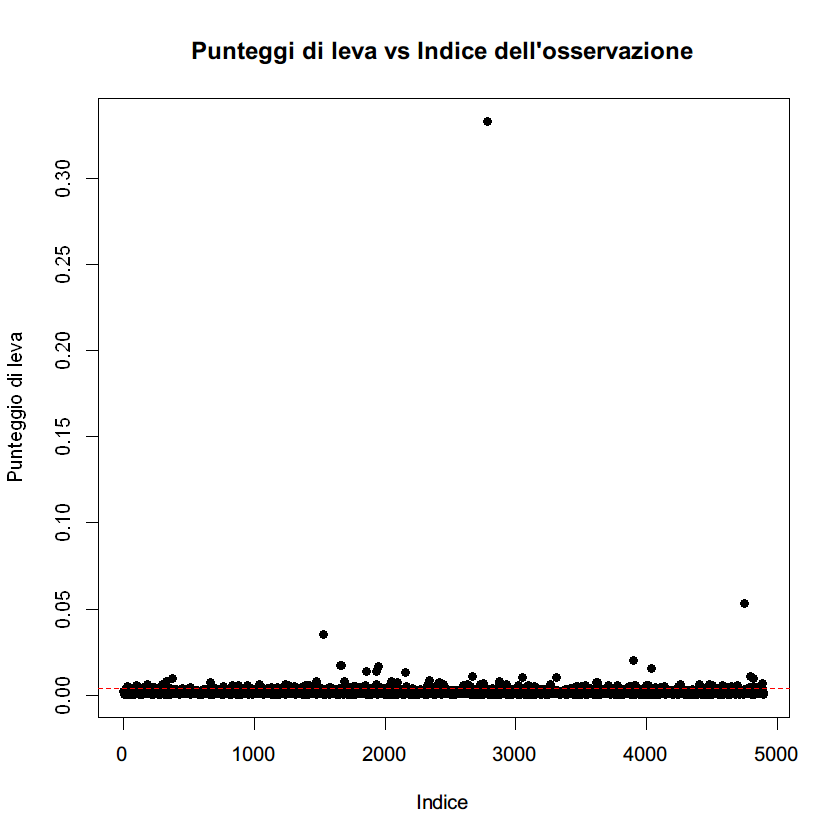

[1] "threshold is:  0.000816659861167824"


,Osservazione,Distanza_di_Cook
,<int>,<dbl>
2782,2782,1.296285700
4746,4746,0.170572482
3308,3308,0.023846753
1932,1932,0.021627577
1689,1689,0.011988755
2051,2051,0.009426667
3902,3902,0.007193798
3051,3051,0.007157160
1418,1418,0.006666070


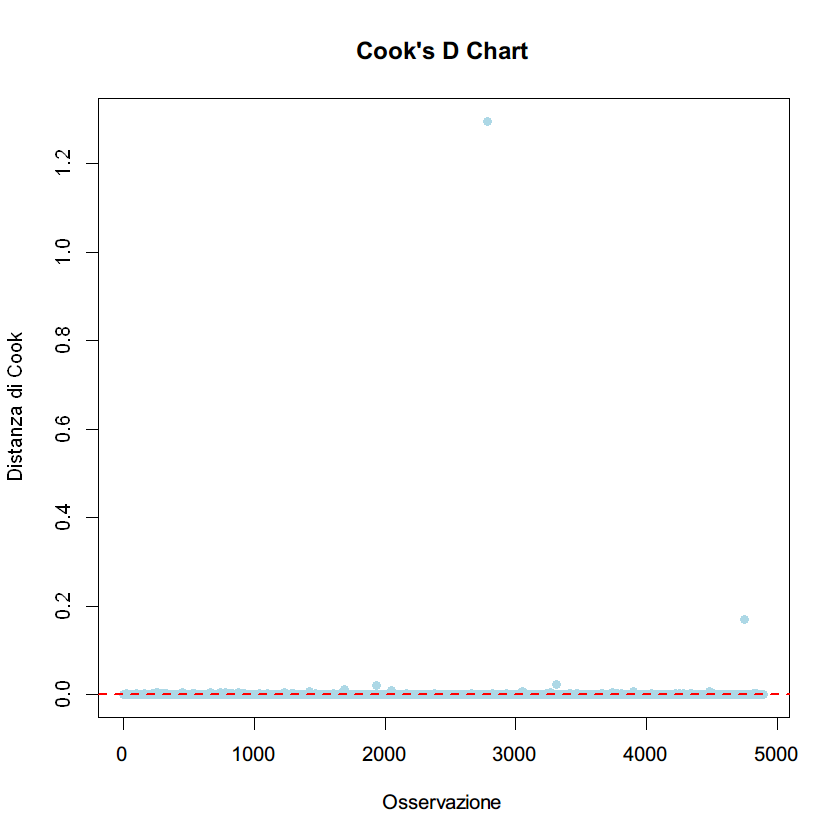

In [104]:
# Outliers

# leverage score
leverage <- hatvalues(mod_r)

# leverage plot
plot(x = 1:length(leverage),
     y = leverage,
     main = "Punteggi di leva vs Indice dell'osservazione",
     xlab = "Indice",
     ylab = "Punteggio di leva",
     pch = 19)

# limit is 2 * (p+1) / n,
p <- length(mod_r$coefficients) - 1
n <- length(leverage)
ll <- 2 * (p+1) / n
abline(h = ll, col = "red", lty = 2)

# Cook's D Chart
# outliers / influenti
cooks <- cooks.distance(mod_r)

plot(x = 1:length(cooks),
     y = cooks,
     main = "Cook's D Chart",
     xlab = "Osservazione",
     ylab = "Distanza di Cook",
     pch = 19,
     col = "light blue")

# limit is 4 / n
lc = 4 / length(cooks)
print(paste("threshold is: ",lc))
abline(h = lc, col = "red", lty = 2, lwd = 2)

cookst <- data.frame(
  Osservazione = 1:length(cooks),
  Distanza_di_Cook = cooks) %>% 
       filter(Distanza_di_Cook > lc) %>%
       arrange(desc(Distanza_di_Cook))
head(cookst,20)

In [109]:
# New valuation model

# outliers index
idx <- cookst$Osservazione

# new df
X_clean <- df_pp[-idx, ]
y_clean <- df_raw$quality[-idx]

# new model valuation
mod_clean <- lm(y_clean ~ ., data = X_clean)
summary(mod_clean)


Call:
lm(formula = y_clean ~ ., data = X_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94583 -0.47213 -0.04206  0.43904  2.07410 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.840e+02  2.092e+01   8.795  < 2e-16 ***
`fixed acidity`         1.109e-01  2.108e-02   5.258 1.52e-07 ***
`volatile acidity`     -1.790e+00  1.038e-01 -17.251  < 2e-16 ***
`citric acid`           8.285e-02  8.305e-02   0.998    0.318    
`residual sugar`        8.676e-02  7.832e-03  11.077  < 2e-16 ***
chlorides              -3.031e-02  4.720e-01  -0.064    0.949    
`free sulfur dioxide`   4.570e-03  7.773e-04   5.879 4.41e-09 ***
`total sulfur dioxide` -4.473e-04  3.374e-04  -1.326    0.185    
density                -1.849e+02  2.120e+01  -8.721  < 2e-16 ***
pH                      8.778e-01  1.008e-01   8.705  < 2e-16 ***
sulphates               6.675e-01  9.079e-02   7.352 2.29e-13 ***
alcohol                 1.513e-01  2.635